In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
det = pd.read_csv("D://Users//ngigi//PycharmProjects//Clean Phising URL detection model//out.csv")



#### Check the dataset.

In [3]:
det.head()

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.0,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.0,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.0,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.0,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0


In [4]:
det.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy,domain_age_days
count,2.500000e+06,2.500000e+06,2.499999e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,1.749311e+06
mean,4.588017e+01,3.907981e+00,1.168567e-01,2.174582e+00,1.141840e-02,7.410540e-01,3.923280e-02,7.777008e-01,4.651602e-01,4.863090e+03
std,7.439959e+01,6.357209e-01,2.451448e-01,1.736380e+00,1.407410e-01,1.662709e+00,3.905095e-01,1.103257e+00,1.880023e-01,3.345879e+03
min,4.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.600000e+01
25%,1.700000e+01,3.452820e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.063967e-01,2.009000e+03
50%,2.900000e+01,3.911860e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.154523e-01,4.281000e+03
75%,5.200000e+01,4.329283e+00,1.333333e-01,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,6.184690e-01,7.740000e+03
max,2.552300e+04,6.048781e+00,2.084000e+01,2.110000e+02,3.200000e+01,3.220000e+02,6.500000e+01,4.300000e+01,1.901504e+00,4.554100e+04


In [5]:
det

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,Phishing.Database,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,"{'domain_name': 'novoatend', 'registrar': None...",NaN
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,Phishing.Database,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,NaN,NaN
2499997,http://yonphweisdowedych.chaseonlinemarketing....,Phishing.Database,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,NaN,NaN
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,Phishing.Database,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,"{'domain_name': 'alternateangle.in', 'registra...",4622.0


In [6]:
det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   url                 object 
 1   source              object 
 2   label               object 
 3   url_length          int64  
 4   starts_with_ip      bool   
 5   url_entropy         float64
 6   has_punycode        bool   
 7   digit_letter_ratio  float64
 8   dot_count           int64  
 9   at_count            int64  
 10  dash_count          int64  
 11  tld_count           int64  
 12  domain_has_digits   bool   
 13  subdomain_count     int64  
 14  nan_char_entropy    float64
 15  has_internal_links  bool   
 16  whois_data          object 
 17  domain_age_days     float64
dtypes: bool(4), float64(4), int64(6), object(4)
memory usage: 276.6+ MB


In [7]:
det.shape

(2500000, 18)

### Get to visualize the dataset that is being processed

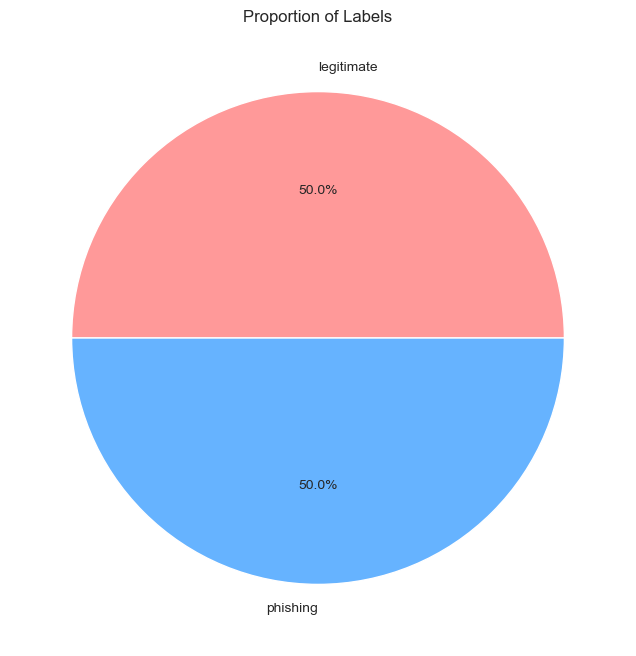

In [8]:
# I choose to work with labels since its has a boolean expression. Legitimate/Phishing

import matplotlib.pyplot as plt

# Visualization 1: Proportion of 'label' with pie chart
label_counts = det['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
# plt.axis('equal')
plt.title('Proportion of Labels')
plt.show()


<Figure size 1200x800 with 0 Axes>

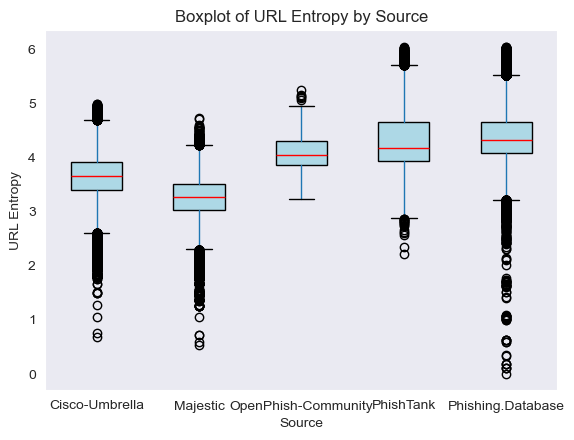

In [9]:
import matplotlib.pyplot as plt

# Visualization 2: Box plot of 'url_entropy' categorized by 'source'
plt.figure(figsize=(12, 8))
det.boxplot(column='url_entropy', by='source', grid=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red'))
plt.title('Boxplot of URL Entropy by Source')
plt.suptitle('')
plt.xlabel('Source')
plt.ylabel('URL Entropy')
plt.show()

### Data cleaning and equalizing the data for best results.

In [10]:
det.shape

(2500000, 18)

##### Check for duplicates.

In [11]:
# We check for duplicates in a dataset
duplicate = det.duplicated()
print(duplicate.value_counts())

False    2500000
Name: count, dtype: int64


In [12]:
duplicate.sum()

0

##### Checking for NaN values or missing values

In [13]:
# URL, url_entropy, Whois_dat, and domain_age_days got the nan values
print(det.isna().sum())

url                        1
source                     0
label                      0
url_length                 0
starts_with_ip             0
url_entropy                0
has_punycode               0
digit_letter_ratio         1
dot_count                  0
at_count                   0
dash_count                 0
tld_count                  0
domain_has_digits          0
subdomain_count            0
nan_char_entropy           0
has_internal_links         0
whois_data            545300
domain_age_days       750689
dtype: int64


##### Handling NaN or missing values using sklearn impute (SimpleImputer)

In [14]:
from sklearn.impute import SimpleImputer

# Handling missing numerical data
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_cols = np.where((det.dtypes == np.int64) | (det.dtypes == np.float64))[0]
imp_mean.fit(det.iloc[:, numerical_cols])
det.iloc[:, numerical_cols] = imp_mean.transform(det.iloc[:, numerical_cols])

# Handling missing string data
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
string_cols = np.where(det.dtypes == object)[0]
imp_most_frequent.fit(det.iloc[:, string_cols])
det.iloc[:, string_cols] = imp_most_frequent.transform(det.iloc[:, string_cols])

In [15]:
print(det.isna().sum())

url                   0
source                0
label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
whois_data            0
domain_age_days       0
dtype: int64


In [16]:
det.loc[:, ['label']]

,label
0,legitimate
1,legitimate
2,legitimate
3,legitimate
4,legitimate
...,...
2499995,phishing
2499996,phishing
2499997,phishing
2499998,phishing


In [17]:
det.shape

(2500000, 18)

In [18]:
det.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy,domain_age_days
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,4.588017e+01,3.907981e+00,1.168567e-01,2.174582e+00,1.141840e-02,7.410540e-01,3.923280e-02,7.777008e-01,4.651602e-01,4.863090e+03
std,7.439959e+01,6.357209e-01,2.451447e-01,1.736380e+00,1.407410e-01,1.662709e+00,3.905095e-01,1.103257e+00,1.880023e-01,2.798812e+03
min,4.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.600000e+01
25%,1.700000e+01,3.452820e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.063967e-01,3.042000e+03
50%,2.900000e+01,3.911860e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.154523e-01,4.863090e+03
75%,5.200000e+01,4.329283e+00,1.333333e-01,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,6.184690e-01,6.141000e+03
max,2.552300e+04,6.048781e+00,2.084000e+01,2.110000e+02,3.200000e+01,3.220000e+02,6.500000e+01,4.300000e+01,1.901504e+00,4.554100e+04


#### Handling missing both numerical data and alphabetical data

In [19]:
import numpy as np
from sklearn.impute import SimpleImputer

# Handling missing numerical data
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_cols = np.where((det.dtypes == np.int64) | (det.dtypes == np.float64))[0]
imp_mean.fit(det.iloc[:, numerical_cols])
det.iloc[:, numerical_cols] = imp_mean.transform(det.iloc[:, numerical_cols])

# Handling missing string data
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
string_cols = np.where(det.dtypes == object)[0]
imp_most_frequent.fit(det.iloc[:, string_cols])
det.iloc[:, string_cols] = imp_most_frequent.transform(det.iloc[:, string_cols])


In [20]:
print(det.isna().sum())

url                   0
source                0
label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
whois_data            0
domain_age_days       0
dtype: int64


In [21]:
print(det.columns.tolist())

['url', 'source', 'label', 'url_length', 'starts_with_ip', 'url_entropy', 'has_punycode', 'digit_letter_ratio', 'dot_count', 'at_count', 'dash_count', 'tld_count', 'domain_has_digits', 'subdomain_count', 'nan_char_entropy', 'has_internal_links', 'whois_data', 'domain_age_days']


#### Dropping columns that are not necessary and prevent the model get accurate data.

In [22]:
det = det.fillna(det['domain_age_days'].median())
det.isna().sum()

url                   0
source                0
label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
whois_data            0
domain_age_days       0
dtype: int64

In [23]:
det = det.drop(['whois_data', 'url'], axis=1)

det

,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,8250.000000
1,Majestic,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,10106.000000
2,Majestic,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,8111.000000
3,Majestic,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,5542.000000
4,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,5098.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,Phishing.Database,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,4863.090231
2499996,Phishing.Database,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,4863.090231
2499997,Phishing.Database,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,4863.090231
2499998,Phishing.Database,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,4622.000000


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
preprocessing = ColumnTransformer(transformers=[
    ("onehotencoder", Pipeline(steps=[
        ("one_encoder", OneHotEncoder(sparse_output=False, drop="first"))
    ]), ['source']),
])

transformed_data = preprocessing.fit_transform(det)
features_names = preprocessing.named_transformers_['onehotencoder'].get_feature_names_out(['source'])
transformed_db = pd.DataFrame(transformed_data.astype(int), columns=features_names)

In [25]:


# The column names you want to select
columns = [ 'source', 'label', 'url_length', 'starts_with_ip', 'url_entropy',
           'has_punycode', 'digit_letter_ratio', 'dot_count', 'at_count', 'dash_count',
           'tld_count', 'domain_has_digits', 'subdomain_count', 'nan_char_entropy',
           'has_internal_links', 'domain_age_days']

# Check for columns that exist in the DataFrame
valid_columns = [col for col in columns if col in det.columns]

# Select those columns
X = det.loc[:, valid_columns]
Y = det.loc[:, ['label']]

# print(x)
# print(y)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
preprocessing = ColumnTransformer(transformers=[
    ("onehotencoder", Pipeline(steps=[
        ("one_encoder", OneHotEncoder(sparse_output=False, drop="first"))
    ]), ['source']),
])

transformed_data = preprocessing.fit_transform(det)
features_names = preprocessing.named_transformers_['onehotencoder'].get_feature_names_out(['source'])
transformed_db = pd.DataFrame(transformed_data.astype(int), columns=features_names)

In [27]:
det.reset_index(drop=True, inplace=True)
transformed_db.reset_index(drop=True, inplace=True)
det = pd.concat([det, transformed_db], axis=1)
det.drop(['source'],axis=1, inplace=True)
det

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days,source_Majestic,source_OpenPhish-Community,source_PhishTank,source_Phishing.Database
0,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,8250.000000,0,0,0,0
1,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,10106.000000,1,0,0,0
2,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,8111.000000,1,0,0,0
3,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,5542.000000,1,0,0,0
4,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,5098.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,4863.090231,0,0,0,1
2499996,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,4863.090231,0,0,0,1
2499997,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,4863.090231,0,0,0,1
2499998,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,4622.000000,0,0,0,1


#### New det dataframe with both "url" and "whois_data" dropped.

In [28]:
X = det.drop(['label'], axis=1)
y = det['label']

In [29]:
det

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days,source_Majestic,source_OpenPhish-Community,source_PhishTank,source_Phishing.Database
0,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,8250.000000,0,0,0,0
1,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,10106.000000,1,0,0,0
2,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,8111.000000,1,0,0,0
3,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,5542.000000,1,0,0,0
4,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,5098.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,4863.090231,0,0,0,1
2499996,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,4863.090231,0,0,0,1
2499997,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,4863.090231,0,0,0,1
2499998,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,4622.000000,0,0,0,1


In [30]:
print(X)

         url_length  starts_with_ip  url_entropy  has_punycode  \
0                45           False     3.924535         False   
1                17           False     3.572469         False   
2                16           False     3.327820         False   
3                16           False     3.500000         False   
4                27           False     3.930270         False   
...             ...             ...          ...           ...   
2499995          48           False     4.068902         False   
2499996          41           False     4.257078         False   
2499997          66           False     4.393366         False   
2499998         102           False     4.763413         False   
2499999          50           False     4.553270         False   

         digit_letter_ratio  dot_count  at_count  dash_count  tld_count  \
0                  0.000000          4         0           0          0   
1                  0.000000          1         0         

In [31]:
print(Y)

              label
0        legitimate
1        legitimate
2        legitimate
3        legitimate
4        legitimate
...             ...
2499995    phishing
2499996    phishing
2499997    phishing
2499998    phishing
2499999    phishing

[2500000 rows x 1 columns]


#### Change "label" column to 0s and 1s

In [32]:
# Display unique values in the 'label' column for clarity
print(det['label'].unique())

# Replace the 'label' values
det['label'] = det['label'].replace({
    "legitimate": 0,
    "phishing": 1
})

det

['legitimate' 'phishing']


C:\Users\ngigi\AppData\Local\Temp\ipykernel_23580\1533877964.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  det['label'] = det['label'].replace({


,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days,source_Majestic,source_OpenPhish-Community,source_PhishTank,source_Phishing.Database
0,0,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,8250.000000,0,0,0,0
1,0,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,10106.000000,1,0,0,0
2,0,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,8111.000000,1,0,0,0
3,0,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,5542.000000,1,0,0,0
4,0,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,5098.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,1,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,4863.090231,0,0,0,1
2499996,1,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,4863.090231,0,0,0,1
2499997,1,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,4863.090231,0,0,0,1
2499998,1,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,4622.000000,0,0,0,1


In [33]:
det.loc[:, ['label']]

,label
0,0
1,0
2,0
3,0
4,0
...,...
2499995,1
2499996,1
2499997,1
2499998,1


#### Model testing and training.

In [34]:

#### Count total NaN at each column in DataFrame

print(det.isna().sum())

label                         0
url_length                    0
starts_with_ip                0
url_entropy                   0
has_punycode                  0
digit_letter_ratio            0
dot_count                     0
at_count                      0
dash_count                    0
tld_count                     0
domain_has_digits             0
subdomain_count               0
nan_char_entropy              0
has_internal_links            0
domain_age_days               0
source_Majestic               0
source_OpenPhish-Community    0
source_PhishTank              0
source_Phishing.Database      0
dtype: int64


In [35]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .75)

In [36]:
X_train.shape

(1875000, 18)

In [37]:
Y_train.shape

(1875000, 1)

In [38]:
x_test.shape

(625000, 18)

In [39]:
y_test.shape

(625000, 1)

In [40]:

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).set_output(transform=pd.DataFrame)

In [42]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(X_train, Y_train)

C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier()

In [43]:
model.score(X_train, Y_train)

1.0

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

det = pd.read_csv("D://Users//ngigi//PycharmProjects//Clean Phising URL detection model//out.csv")
det.drop(['whois_data', 'url'], axis=1, inplace=True)
det['label'] = det['label'].replace({"legitimate": 0, "phishing": 1})

X = det.drop(['label'], axis=1)
y = det['label']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0))])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

C:\Users\ngigi\AppData\Local\Temp\ipykernel_23580\1188144021.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  det['label'] = det['label'].replace({"legitimate": 0, "phishing": 1})
C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


1.0


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

det = pd.read_csv("D://Users//ngigi//PycharmProjects//Clean Phising URL detection model//out.csv")
det.drop(['whois_data', 'url'], axis=1, inplace=True)
det['label'] = det['label'].replace({"legitimate": 0, "phishing": 1})

X = det.drop(['label'], axis=1)
y = det['label']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75, stratify=y)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

C:\Users\ngigi\AppData\Local\Temp\ipykernel_23580\1550219315.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  det['label'] = det['label'].replace({"legitimate": 0, "phishing": 1})


1.0


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

det = pd.read_csv("D://Users//ngigi//PycharmProjects//Clean Phising URL detection model//out.csv")
det.drop(['whois_data', 'url'], axis=1, inplace=True)
det['label'] = det['label'].replace({"legitimate": 0, "phishing": 1})

X = det.drop(['label'], axis=1)
y = det['label']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0))])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

# Training the classifier for 'n' epochs
epochs = 10
for epoch in range(epochs):
    clf.fit(X_train, y_train)
    print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {clf.score(X_test, y_test)}")

C:\Users\ngigi\AppData\Local\Temp\ipykernel_23580\951165348.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  det['label'] = det['label'].replace({"legitimate": 0, "phishing": 1})
C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 1/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 2/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 3/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 4/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 5/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 6/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 7/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 8/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 9/10 - Accuracy: 1.0


C:\Users\ngigi\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Epoch 10/10 - Accuracy: 1.0
